<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana4/2%20Teorema_del_limite_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Importar liberías y archivos

In [1]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

## Definición de funciones

In [55]:
def errores_alturas(n, m = 500):
    '''
    n = tamaño de cada muestra
    m = cuántas muestras
       
    '''
    mu, sigma = 1675, 62.8     # dimensiones en milimetros

    muestras = {'muestra '+ str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
    alturas_hombres = pd.DataFrame.from_dict(muestras)
    sns.distplot(mu - alturas_hombres.mean(), fit=norm, kde=False, bins=50)
    plt.show()



In [2]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

In [3]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista, 
  por ejemplo:   autor, titulo y otros elementos'''
  
  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [4]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas 
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes 
  
  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

In [5]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para 
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n]) 
    
  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama
  
  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [6]:
def genera_muestras_de_texto(texto, grado=0, 
                             num_muestras=100, 
                             tam_muestra=200 ):
  muestras={}
  for i in range(num_muestras):
    if grado == 0:
      muestras[i]= "".join(random.sample(texto, tam_muestra))
    else:
      muestras[i] = genera_texto_nletras(texto, grado, tam_muestra)
  return pd.Series(muestras, name= 'muestra' )

In [7]:
def cuenta_vocales(texto):
  vocales ='aeiou'
  tot_vocales= 0
  for caracter in texto:
    if caracter in vocales:
      tot_vocales += 1
  return tot_vocales

In [8]:
def cuenta_caracteres_antes_de_n(texto):
  caracteres_antes = 0
  for caracter in texto:
    if caracter == 'n':
      break
    caracteres_antes += 1

  return caracteres_antes

# Distribución gaussiana

## Obtener muestras

a partir de la [distribución de la altura de trabajadores industriales de sexo masculino en Guadalajara](https://www.researchgate.net/publication/31722433_Dimensiones_antropometricas_de_la_poblacion_latinoamericana_Mexico_Cuba_Colombia_Chile_R_Avila_Chaurand_LR_Prado_Leon_EL_Gonzalez_Munoz)

In [49]:
mu, sigma = 1675, 62.8     # dimensiones en milimetros

n = 100 # tamaño de la muestra
m = 1000 # número de muestras
muestras = {'muestra '+str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
alturas_hombres = pd.DataFrame.from_dict(muestras)
alturas_hombres

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 991,muestra 992,muestra 993,muestra 994,muestra 995,muestra 996,muestra 997,muestra 998,muestra 999,muestra 1000
0,1615.552371,1735.825344,1735.017534,1718.588867,1721.979712,1570.291706,1745.335377,1569.296097,1604.181033,1724.338889,...,1688.984393,1645.991437,1698.027626,1642.586096,1716.132798,1690.024563,1787.981305,1652.029241,1619.348503,1771.278817
1,1811.286430,1766.559388,1613.967896,1672.790865,1616.303973,1600.482471,1725.286817,1802.053887,1640.703845,1660.379141,...,1711.220720,1669.180573,1727.693706,1679.988390,1741.621643,1533.499861,1761.700432,1597.136303,1626.930767,1730.550885
2,1669.555067,1720.330348,1708.874616,1618.116394,1712.774216,1677.436149,1669.639406,1733.457414,1648.292726,1638.451349,...,1697.426354,1766.800491,1760.691084,1683.144380,1672.939712,1684.692603,1672.755107,1808.821703,1652.119999,1516.050646
3,1788.177475,1747.890157,1668.911827,1678.728907,1654.388683,1670.883372,1714.063733,1539.955961,1631.792635,1645.101853,...,1799.830471,1751.268045,1575.964560,1623.795497,1756.189923,1643.970696,1624.534214,1670.089837,1710.738670,1748.424362
4,1650.305584,1650.592549,1618.801288,1714.263624,1736.645504,1740.309658,1681.570178,1695.097238,1495.877007,1698.408873,...,1668.937723,1629.371563,1650.887005,1532.696263,1667.279924,1717.902519,1674.159084,1610.579291,1791.107399,1756.553083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1685.913767,1679.781694,1511.019164,1751.620366,1738.041486,1602.650141,1717.225200,1570.571590,1711.289435,1687.500582,...,1611.993116,1675.179175,1639.860192,1837.358661,1594.629602,1663.137978,1715.272400,1697.627730,1689.306829,1615.745247
96,1626.794183,1533.361708,1706.146330,1553.391756,1594.091098,1653.822883,1672.352891,1798.460530,1679.953197,1722.820913,...,1691.124950,1719.481613,1617.778937,1751.061210,1763.485806,1747.214417,1734.344964,1666.828317,1676.795728,1769.266432
97,1800.614988,1706.808443,1597.389571,1720.319378,1659.533925,1641.304920,1716.460071,1627.103502,1690.973982,1710.106681,...,1667.953030,1580.349698,1683.616556,1626.491392,1791.765765,1640.743575,1622.181721,1591.286441,1715.784392,1723.977966
98,1648.854596,1607.735735,1712.321677,1624.967409,1676.479033,1643.758062,1664.380734,1592.112360,1715.391725,1725.609597,...,1699.769031,1647.684187,1757.567634,1710.905937,1662.051227,1714.364863,1605.188397,1661.585247,1657.596984,1722.879433


<h2> Distribución de cada muestra

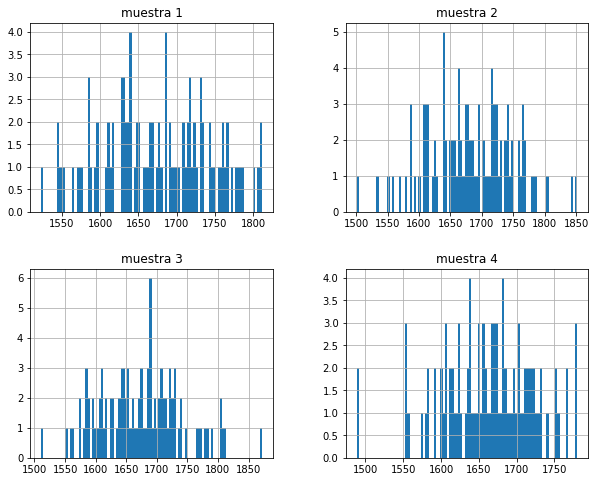

In [50]:
alturas_hombres.iloc[:,0:4].hist(figsize = (10,8), bins=100)
plt.show()

## Distribución de los promedios

In [54]:
medias = alturas_hombres.mean()
medias

muestra 1       1674.786347
muestra 2       1680.493249
muestra 3       1673.422410
muestra 4       1662.796839
muestra 5       1676.127077
                   ...     
muestra 996     1674.603138
muestra 997     1668.647927
muestra 998     1675.922423
muestra 999     1682.024156
muestra 1000    1674.506571
Length: 1000, dtype: float64

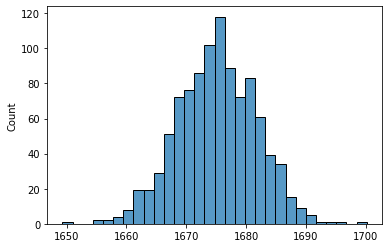

In [67]:
sns.histplot(medias,  bins=30)
plt.show()

## Distribución de los errores

In [52]:
errores = mu - medias
errores

muestra 1        0.213653
muestra 2       -5.493249
muestra 3        1.577590
muestra 4       12.203161
muestra 5       -1.127077
                  ...    
muestra 996      0.396862
muestra 997      6.352073
muestra 998     -0.922423
muestra 999     -7.024156
muestra 1000     0.493429
Length: 1000, dtype: float64

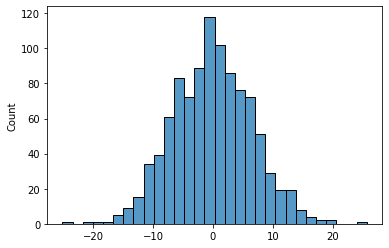

In [99]:
sns.histplot(errores,  bins=30)
plt.show()

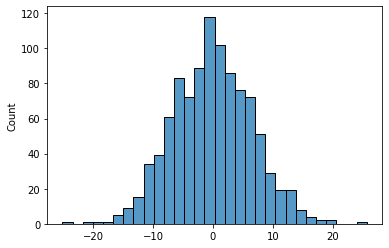

In [100]:
sns.histplot(errores,  bins=30)
plt.show()

# Distribución Bernoulli

#### Preprocesar libro y obtener probabilidades de los caracteres 

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [109]:
#Leer libro
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
borrar = ['Gabriel García Márquez', 
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar) 
libro_limpio = limpiar_texto(libro)

In [119]:
Ley_P_letras

,caracter,probabilidad,tipo
0,,0.174719,no_vocal
1,a,0.111833,vocal
2,b,0.014382,no_vocal
3,c,0.033636,no_vocal
4,d,0.043164,no_vocal
5,e,0.104264,vocal
6,f,0.005159,no_vocal
7,g,0.008022,no_vocal
8,h,0.007221,no_vocal
9,i,0.052305,vocal


In [126]:
#Cargar csv con distribución de probabilidad de letras
Ley_P_letras = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana4/Ley_Probabilidad_caracteres_100a%C3%B1os.csv')

# Calcular la probabilidad de obtener una vocal

filtro_vocal = Ley_P_letras['caracter'].isin(list('aeiou'))
p = Ley_P_letras.loc[filtro_vocal, 'probabilidad'].sum()
p

0.38405272562528125

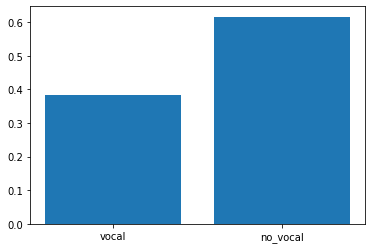

In [128]:
# Distribución bernoulli

plt.bar(['vocal','no_vocal'],[p, 1-p])
plt.show()

### Obtener muestras

In [152]:
%%time
n = 200 # tamaño de la muestra
m = 100000 # número de muestras

muestras=pd.DataFrame()
muestras['texto'] = (genera_muestras_de_texto(libro_limpio, grado = 0,
                                              num_muestras = m, tam_muestra=n))
indice=pd.Series(['muestra_'+str(i) for i in range (1, m+1)])
muestras.index=indice
muestras['vocales'] = muestras['texto'].apply(cuenta_vocales)
muestras['p_estimada'] = muestras['vocales']/n
muestras['errores']= p - muestras['vocales']/n

CPU times: user 18.4 s, sys: 79.1 ms, total: 18.5 s
Wall time: 18.7 s


In [153]:
muestras.head()

,texto,vocales,p_estimada,errores
muestra_1,aoyun secasp dcinitan l utc ussfat cqtaplvn ...,70,0.35,0.034053
muestra_2,l nnlcysscs sv s s aausin eaaahi osciduatd...,72,0.36,0.024053
muestra_3,apgt miadaaaeialdicb e omo aao a szgu rdaaen ...,74,0.37,0.014053
muestra_4,loaebre ldeaoaqdutsosa ei edo e emtr pa etv...,80,0.40,-0.015947
muestra_5,rnni l pacjtenlve l oqpubloeoadcl a nndi el...,72,0.36,0.024053


### Distribución de los promedios

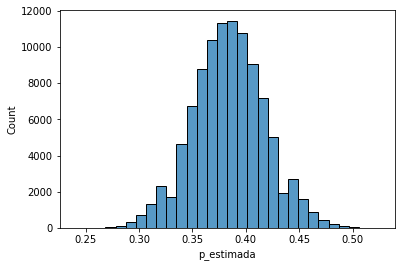

In [146]:
sns.histplot(muestras['p_estimada'],  bins=30)
plt.show()

## Distribución de los errores

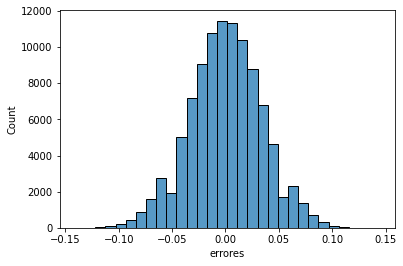

In [147]:
sns.histplot(muestras['errores'],  bins=30)
plt.show()

# Distribución exponencial

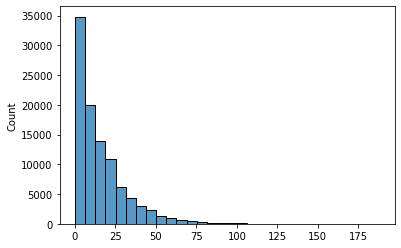

In [162]:
X = muestras['texto'].apply(cuenta_caracteres_antes_de_n).values
sns.histplot(X,  bins=30)
plt.show()

In [143]:
X.mean()

15.87654

**Ejemplos de fenómenos con distribución exponencial:**
- Valores máximos de precipitación diaria
- Compras efectuadas por visitantes en página web
- Tiempo para que se produzca un fallo


¿Qué otros??

### Obtener muestras

In [199]:
n = 200 # tamaño de la muestra
m = 2000 # número de muestras
m_exp = {'muestra '+str(i):np.random.choice(X, n) for i in range(1, m+1)}

muestras_exp = pd.DataFrame.from_dict(m_exp)
muestras_exp

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,84,5,46,12,28,5,50,27,5,95,...,2,0,46,4,67,18,25,22,49,2
1,1,6,2,16,10,0,13,22,0,25,...,18,23,0,5,4,14,4,2,14,9
2,7,8,5,20,5,20,2,1,6,6,...,49,34,30,65,21,17,18,0,9,7
3,10,26,2,42,34,59,4,28,2,17,...,10,3,9,56,8,74,13,4,9,12
4,19,22,4,2,6,5,29,33,14,22,...,31,24,18,9,11,10,7,11,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,14,10,9,4,18,12,64,20,20,28,...,40,19,10,29,13,18,18,32,36,3
196,24,18,1,7,24,22,24,6,12,21,...,9,0,8,2,50,15,6,5,15,34
197,3,38,10,0,6,9,0,0,0,6,...,20,1,2,18,14,36,0,13,11,18
198,10,14,14,37,3,35,1,2,1,44,...,41,10,5,0,0,84,6,26,36,1


### Distribución de cada muestra

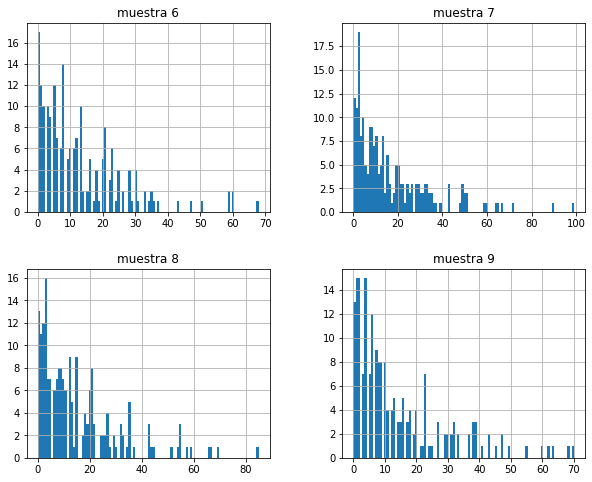

In [200]:
muestras_exp.iloc[:,5:9].hist(figsize = (10,8), bins=100)
plt.show()

### Distribución de los promedios

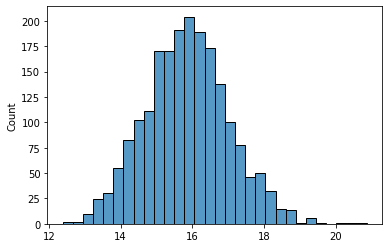

In [201]:
sns.histplot(muestras_exp.mean(),  bins=30)
plt.show()


## Distribución de los errores

In [205]:
X.mean()

15.8468

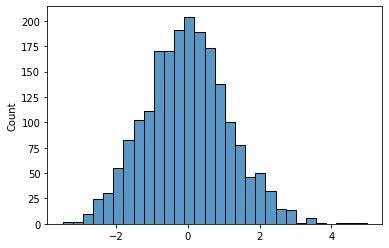

In [204]:
errores = muestras_exp.mean() - X.mean()
sns.histplot(errores,  bins=30)
plt.show()



https://seeing-theory.brown.edu/probability-distributions/index.html

